–í —ç—Ç–æ–π —Ç–µ—Ç—Ä–∞–¥–∫–µ —Ä–∞–∑–±–µ—Ä–µ–º –æ—Å–Ω–æ–≤–Ω—ã–µ —Ç–µ—Ö–Ω–∏–∫–∏ —Ä–∞–±–æ—Ç—ã –≤ –∑–∞–¥–∞—á–∞—Ö, –≥–¥–µ –æ–¥–∏–Ω –∏–∑ –∫–ª–∞—Å—Å–æ–≤ –∑–∞–Ω–∏–º–∞–µ—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –º–µ–Ω—å—à—É—é –¥–æ–ª—é –≤—ã–±–æ—Ä–∫–∏, —á–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
from sklearn.metrics import precision_recall_curve
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

 EDA

–í –∫–∞—á–µ—Å—Ç–≤–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –Ω–∞—à–µ–π —Ä–∞–±–æ—Ç—ã –≤–æ–∑—å–º–µ–º –≤—ã–ª–æ–∂–µ–Ω–Ω—ã–π –Ω–∞ kaggle –¥–∞—Ç–∞—Å–µ—Ç —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π, –≤ –∫–æ—Ç–æ—Ä–æ–º –Ω—É–∂–Ω–æ –≤—ã–∏—Å–∫–∏–≤–∞—Ç—å –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏–µ –ø—Ä–æ–≤–æ–¥–∫–∏: [–∫–ª–∏–∫](https://www.kaggle.com/mlg-ulb/creditcardfraud). –î–∞–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –ø–æ–¥—Ö–æ–¥–∏—Ç –ø–æ–¥ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—É—é, —á—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –¥–∞–∂–µ –±–µ–∑ –Ω–∞–ª–∏—á–∏—è –∫–∞–∫–∏—Ö-–ª–∏–±–æ –¥–∞–Ω–Ω—ã—Ö (–ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—á–µ–Ω—å –º–∞–ª–∞—è —á–∞—Å—Ç—å –±—É–¥–µ—Ç –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–æ–π).

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ, –ø—Ä–æ–≤–µ–¥–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–∞–Ω–∏–ø—É–ª—è—Ü–∏–∏.

In [ ]:
"""%%bash
kaggle datasets download -d mlg-ulb/creditcardfraud
unzip creditcardfraud.zip""";

In [ ]:
!gdown --id "1RDNBmC-DO1LoAenN7IhlGJtv-lQK88n-" && unzip archive.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1RDNBmC-DO1LoAenN7IhlGJtv-lQK88n-
From (redirected): https://drive.google.com/uc?id=1RDNBmC-DO1LoAenN7IhlGJtv-lQK88n-&confirm=t&uuid=e5b6f3bb-91d5-4001-9629-55a18c303f28
To: /content/archive.zip
100% 69.2M/69.2M [00:01<00:00, 45.4MB/s]
Archive:  archive.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801   
1      -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235   
2       1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084   
3       1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228   
4       0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
0      -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993   
1       0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783   
2       0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857   
3       0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622   
4       1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1      -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2       0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3      -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4       0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Amount  Class  
0       0.133558 -0.021053  149.62      0  
1      -0.008983  0.014724    2.69      0  
2      -0.055353 -0.059752  378.66      0  
3       0.062723  0.061458  123.50      0  
4       0.219422  0.215153   69.99      0  


–ù–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –∞–Ω–æ–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω—ã. –ú—ã –∏–º–µ–µ–º 30 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö 28 - —ç—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã PCA-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –Ω–∞ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ. –ï—â–µ 2 –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –≤—Ä–µ–º—è –≤ —Å–µ–∫—É–Ω–¥–∞—Ö, –ø—Ä–æ—à–µ–¥—à–µ–µ —Å –º–æ–º–µ–Ω—Ç–∞ –ø–µ—Ä–≤–æ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ, –∏ —Ä–∞–∑–º–µ—Ä —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏.

–ù–∞–π–¥–µ–º –¥–æ–ª—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –≤—ã–±–æ—Ä–∫–µ

In [ ]:
#your code here
df['Class'].mean()

0.001727485630620034

–ù–∞—á–Ω–µ–º —Å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—Ä–µ–º–µ–Ω–∏. –°–µ–∫—É–Ω–¥—ã —Å–∞–º–∏ –ø–æ —Å–µ–±–µ –Ω–µ –Ω–µ—Å—É—Ç –±–æ–ª—å—à–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è—Ö –≤ –¥–∞–Ω–Ω—ã—Ö, –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ –Ω–∏–º —Å–æ–∑–¥–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ "—á–∞—Å" (–æ—Ç 0 –¥–æ 23) –∏ "–¥–µ–Ω—å" (–æ—Ç 0 –¥–æ ...)

In [ ]:
#your code here
df['Day'] = (df['Time'] // (60 * 60 * 24)).astype(int)
df['Hour'] = ((df['Time'] - df['Day']* 60 * 60 * 24) / 3600).astype(int)

In [ ]:
df["Day"].value_counts() # 2 –¥–Ω—è(0 –∏ 1)

Day
0    144786
1    140021
Name: count, dtype: int64

–ü–æ—Å—Ç—Ä–æ–∏–º —Å–ª–µ–¥—É—é—â–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏:

1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É —á–∞—Å—É
2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É —á–∞—Å—É
3. –¢–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –¥–Ω–µ–π


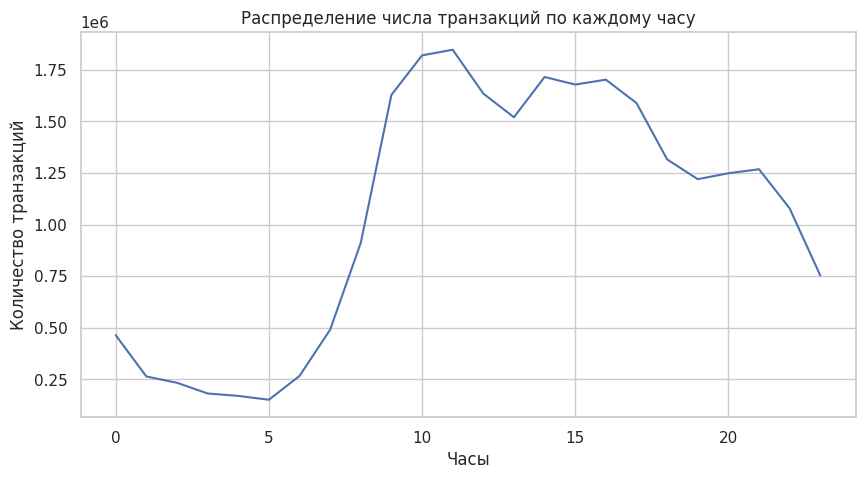

In [ ]:
#your code here
plt.figure(figsize=(10, 5))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É —á–∞—Å—É')
plt.xlabel('–ß–∞—Å—ã')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
plt.plot(df.groupby(by='Hour')['Amount'].sum())
plt.show()

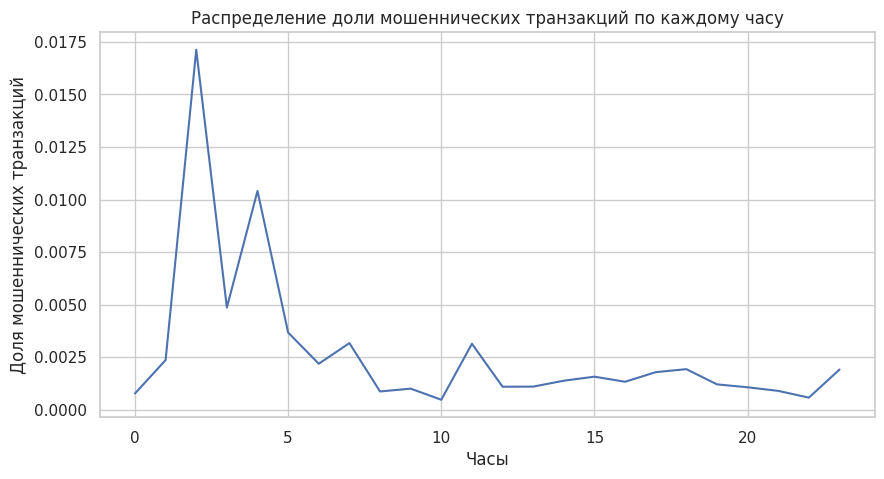

In [ ]:
#your code here
plt.figure(figsize=(10, 5))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É —á–∞—Å—É')
plt.xlabel('–ß–∞—Å—ã')
plt.ylabel('–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
plt.plot(df.groupby(by='Hour')['Class'].mean())
plt.show()

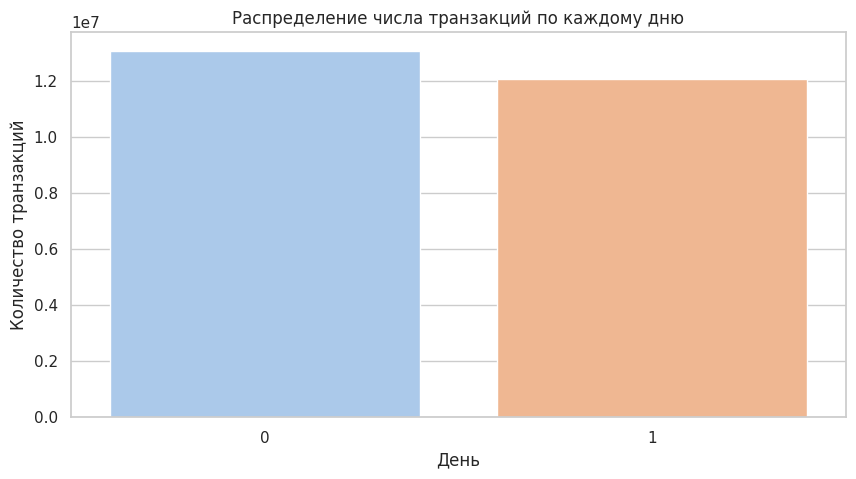

In [ ]:
#your code here
plt.figure(figsize=(10, 5))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –¥–Ω—é')
plt.xlabel('–î–µ–Ω—å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
plot = sns.barplot(y=df.groupby(by='Day')['Amount'].sum(), x = [0, 1], palette="pastel")
plt.show()

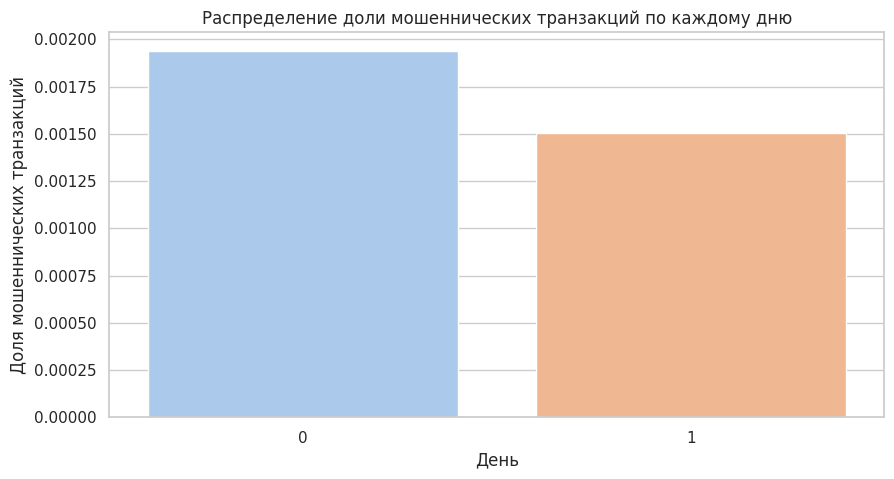

In [ ]:
#your code here
plt.figure(figsize=(10, 5))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –¥–Ω—é')
plt.xlabel('–î–µ–Ω—å')
plt.ylabel('–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
plot = sns.barplot(y=df.groupby(by='Day')['Class'].mean(), x = [0, 1], palette="pastel")
plt.show()

In [ ]:
df["Hour"].value_counts()

Hour
21    17703
18    17039
11    16856
20    16756
10    16598
14    16570
15    16461
16    16453
17    16166
9     15838
19    15649
22    15441
12    15420
13    15365
23    10938
8     10276
0      7695
7      7243
1      4220
6      4101
3      3492
2      3328
5      2990
4      2209
Name: count, dtype: int64

 –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ —Å 8 –¥–æ 19 -  —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å. –ú–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏, –Ω–∞–æ–±–æ—Ä–æ—Ç, –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –≤–µ–¥—É—Ç—Å—è –≤ –Ω–µ—Ä–∞–±–æ—á–µ–µ –≤—Ä–µ–º—è. –ß–∏—Å–ª–æ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö –æ–ø–µ—Ä–∞—Ü–∏–π –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ —á–∏—Å–ª—É –æ–ø–µ—Ä–∞—Ü–∏–π –≤—Å–µ–≥–æ.

–° –∞–Ω–æ–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –≤—Ä—è–¥ –ª–∏ –º–æ–∂–Ω–æ –ø—Ä–∏–¥—É–º–∞—Ç—å —á—Ç–æ-—Ç–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–µ. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å –ø–æ–º–æ—â—å—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏?) –≤—ã–±—Ä–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –ø–æ–≥–ª—è–¥–µ—Ç—å –Ω–∞ —Ä–∞–∑–ª–∏—á–∏—è –≤ –∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.

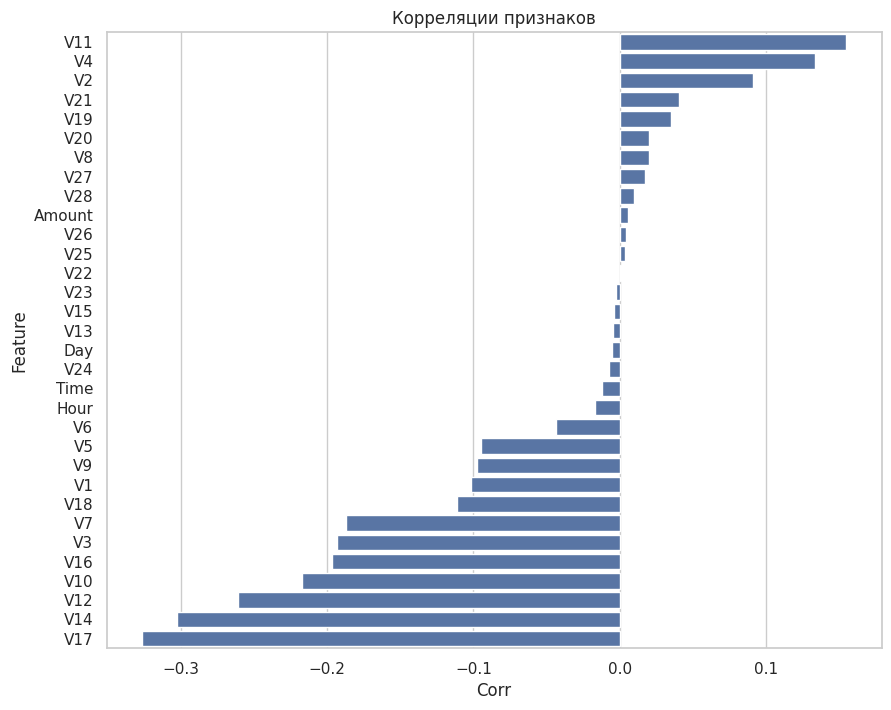

In [ ]:
#your code here
features = (list(df.columns))
features.remove('Class')
plt.figure(figsize=(10, 8))
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.xlabel('Corr')
plt.ylabel("Feature")
corrs = df[features].corrwith(df['Class']).sort_values(ascending=False)
plot = sns.barplot(y=corrs.index, x=corrs)

–í–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª—å—à—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ç–∞—Ä–≥–µ—Ç–æ–º —É –Ω–∞—Å –∏–º–µ—é—Ç —Å–ª–µ–¥—É—é—â–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ.

In [ ]:
features_corr = abs(corrs).sort_values(ascending=False)[:4]
features_corr.index.tolist()

['V17', 'V14', 'V12', 'V10']

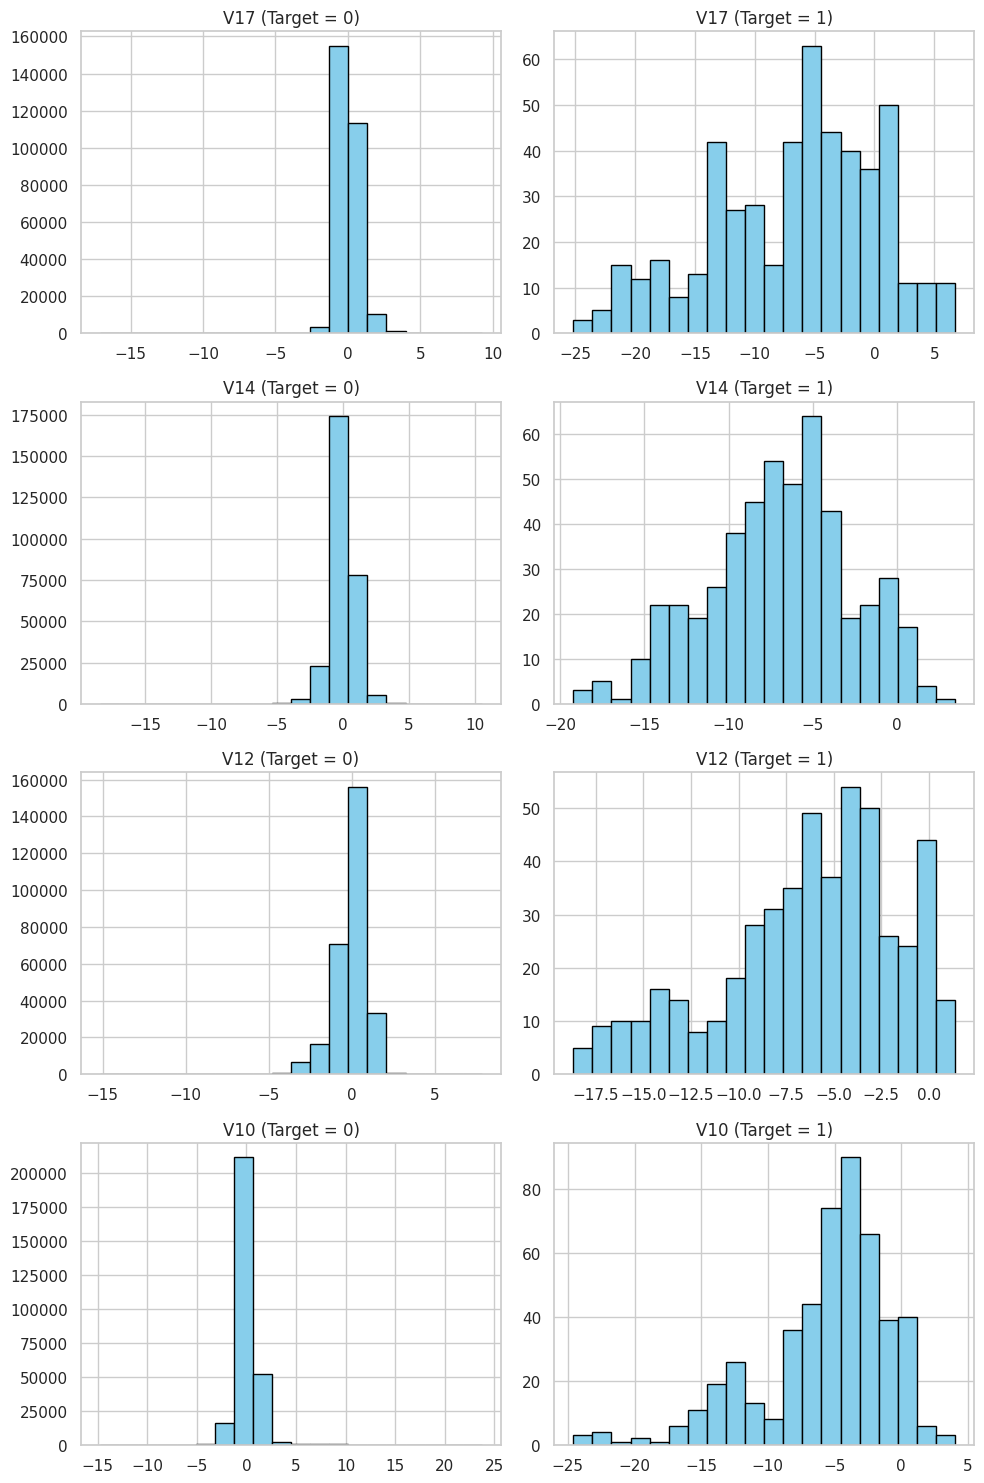

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
titles = features_corr.index.tolist()

for i in range(4):
    for j in range(2):
        data = df[df["Class"] == j][titles[i]]
        axs[i, j].hist(data, bins=20, color='skyblue', edgecolor='black')
        axs[i, j].set_title(f'{titles[i]} (Target = {j})')

plt.tight_layout()
plt.show()


–ù—É —Ç—É—Ç —è–≤–Ω–æ –≤–∏–¥–∏–º —Ä–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤ 0 –∏ 1. –î–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö –æ–ø–µ—Ä–∞—Ü–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–∏–Ω–∏–º–∞—é—Ç —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ —Ä–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –±–æ–ª—å—à–æ–º –ø—Ä–æ–º–µ–¥—É—Ç–∫–µ –∑–Ω–∞—á–µ–Ω–∏–π, –∞ –¥–ª—è –æ–±—ã—á–Ω—ã—Ö - –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ–∫–æ–ª–æ –Ω—É–ª—è –∏ —Å–ª–∞–±–æ —Ä–∞—Å–ø–ª—ã–≤–∞–µ—Ç—Å—è –ø–æ –æ—Å–∏ - –∫–æ—Ä–æ—á–µ –¥–∏—Å–ø–µ—Ä—Å–∏—è –º–µ–Ω—å—à–µ

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ. –û—Ç–¥–µ–ª–∏–º —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 20% —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ –ø–æ–¥–µ–ª–∏—Ç–µ –∏—Ö –ø–æ–ø–æ–ª–∞–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ. –≠—Ç–æ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–µ —Å–æ–≤—Å–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ (–∫–∞–∫ –º–æ–∂–Ω–æ –±—ã–ª–æ –∑–∞–º–µ—Ç–∏—Ç—å, –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –∏–º–µ—é—Ç —Ä–∞–∑–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ –≤—Ä–µ–º–µ–Ω–∏ - –ø–æ-—Ö–æ—Ä–æ—à–µ–º—É, –Ω–∞–º —Å—Ç–æ–∏–ª–æ –±—ã –≤—ã–¥–µ–ª–∏—Ç—å —Ü–µ–ª—ã–µ —Å—É—Ç–∫–∏ –∑–∞–ø–∏—Å–µ–π –∫–∞–∫ –ø–æ–¥ –≤–∞–ª–∏–¥–∞—Ü–∏—é, —Ç–∞–∫ –∏ –ø–æ–¥ —Ç–µ—Å—Ç), —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ, –æ–±–æ–π–¥–µ–º—Å—è —ç—Ç–∏–º.

In [ ]:
from sklearn.model_selection import train_test_split
y = df["Class"]
X = df.drop(columns=["Class", "Time", "Day"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

In [ ]:
X_train

V1        V2        V3        V4        V5        V6        V7  \
0      -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1       1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2      -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3      -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4      -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...          ...       ...       ...       ...       ...       ...       ...   
227840  2.028950 -0.374089 -1.268051  0.349127 -0.057977 -0.515489 -0.087045   
227841  0.306600  1.116021 -0.047348  3.593785  2.079047  5.748707 -2.059246   
227842 -1.781954  2.062680 -3.758871 -1.801001 -0.084365  1.919610 -1.454364   
227843 -0.061507  1.024900 -0.170060 -0.263220  0.982164 -1.162749  1.468942   
227844  2.050034 -0.103557 -1.204713  0.207198  0.108850 -0.665621  0.073598   

              V8        V9       V10       V11       V12       V13       V14  \
0       0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1       0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2       0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3       0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4      -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
...          ...       ...       ...       ...       ...       ...       ...   
227840 -0.146316  1.001341  0.007773 -1.307879 -0.003230 -0.684642  0.109699   
227841 -1.352120 -1.849240  1.000154 -0.330464 -0.202383 -0.129313  0.713813   
227842 -9.825473 -2.073119 -0.005816 -0.644403  0.982035  0.243801  1.541216   
227843 -0.648407 -0.157586 -0.764370 -0.442168  0.024224  0.865039 -1.203879   
227844 -0.164464  0.303531  0.242471  0.614559  1.016880  0.081998  0.441357   

             V15       V16       V17       V18       V19       V20       V21  \
0       1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1       0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2       2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3      -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4       0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
...          ...       ...       ...       ...       ...       ...       ...   
227840 -0.461828 -0.330118 -0.087021 -0.437197  0.222290 -0.194318  0.047287   
227841  1.309414  0.399616  0.038217 -0.097967  0.632624  0.865457 -1.458527   
227842 -1.949005 -1.278610 -0.179722  1.616439 -0.740407 -0.690810  1.234747   
227843  0.627917 -0.103494  0.238910  0.634188 -0.030689  0.035225  0.299618   
227844 -0.635926  0.203137 -0.682642 -0.251580  0.582943 -0.201782 -0.263799   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
227840  0.323331  0.080683  0.727965  0.070118  0.723291 -0.083032 -0.061277   
227841 -0.234478  0.258831  0.639005 -0.048250  0.144586  0.216385  0.304545   
227842  0.376804 -0.339706 -0.216688 -1.555393  0.655873  0.777662  0.272753   
227843  1.177722 -0.296209 -0.140335 -0.465171 -0.197933 -0.048916  0.023871   
227844 -0.654763  0.280573 -0.405691 -0.274672  0.202719 -0.074529 -0.074279   

        Amount  Hour  
0       149.62     0  
1         2.69     0  
2       378.66     0  
3       123.50     0  
4        69.99     0  
...        ...   ...  
227840   

# –ù–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è.

**–ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–ª—è –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏**:
–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–∞—â–µ –≤—Å–µ–≥–æ "–ª–æ–º–∞—é—Ç—Å—è" –Ω–∞ –∑–∞–¥–∞—á–∞—Ö —Å —Å–∏–ª—å–Ω—ã–º –ø–µ—Ä–µ–∫–æ—Å–æ–º.

–º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ —Ç–∞–∫–∏—Ö –∑–∞–¥–∞—á–∞—Ö `AUC-PR` –∏ –ø–æ–ª—É—á–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏. –ú–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ `AUC-PR` –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ `precision` –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é, –∑–∞–¥–∞–Ω–Ω–æ–º—É –≤—ã–∏–≥—Ä—ã—à–µ–º –≤ `recall` –ø—Ä–∏ —Å–º–µ–Ω–µ –ø–æ—Ä–æ–≥–∞.

In [ ]:
# from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc as gigaauc
def average_precision_score(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return gigaauc(recall, precision)

–¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, —Å—É—â–µ—Å—Ç–≤—É—é—Ç –∏ –¥—Ä—É–≥–∏–µ, –Ω–µ –º–µ–Ω–µ–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏. –û–¥–Ω–æ–π –∏–∑ —Ç–∞–∫–∏—Ö –º–µ—Ç—Ä–∏–∫ —è–≤–ª—è–µ—Ç—Å—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ö–∞–ø–ø–∞ –ö–æ—ç–Ω–∞, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏–π —Å–æ–±–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—É—é `accuracy`:


In [ ]:

from sklearn.metrics import cohen_kappa_score

In [ ]:

from sklearn.metrics import matthews_corrcoef

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ —ç—Ç–∏ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –Ω–∞ –±–∏–Ω–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Å–º—ã—Å–ª –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–æ—Ä–æ–≥–∞ –±–∏–Ω–∞—Ä–∏–∑–∞—Ü–∏–∏.

In [ ]:

print(f'AUC-PR: {average_precision_score(y_test, [0]*y_test.shape[0])}')
print(f'kappa: {cohen_kappa_score(y_test, [0]*y_test.shape[0])}')
print(f'matthews: {matthews_corrcoef(y_test, [0]*y_test.shape[0])}')

AUC-PR: 0.5003862223938766
kappa: 0.0
matthews: 0.0


–î–∞–≤–∞–π—Ç–µ –∑–∞–ø—É—Å—Ç–∏–º –±–µ–π–∑–ª–∞–π–Ω-—Ä–µ—à–µ–Ω–∏–µ –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ - `catboost` –Ω–∞ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:

catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

In [ ]:
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.6775652960343049
kappa: 0.7498260790128315
matthews: 0.7536088618289372


**–î–æ–±–∞–≤–∏–º –≤–µ—Å–∞ –≤ –∫–∞—Ç–±—É—Å—Ç**

In [ ]:
#your code here
_, counts = np.unique(y_train, return_counts=True)
catboost = CatBoostClassifier(use_best_model=True, scale_pos_weight=counts[0] / counts[1], task_type="GPU")
catboost.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

In [ ]:
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.6886481592471054
kappa: 0.15569905875718437
matthews: 0.25153591404417874


–ü–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã–π –≤–µ—Å –±—É–¥–µ—Ç —è–≤–ª—è—Ç—å—Å—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –º–µ—Ç–æ–¥–∞, –±—ã–ª–æ –±—ã –æ–ø—Ä–æ–º–µ—Ç—á–∏–≤–æ –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –Ω–∞ –æ–¥–Ω–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏. –ó–∞–ø—É—Å—Ç–∏–º –ø–µ—Ä–µ–±–æ—Ä –¥–ª—è —ç—Ç–æ–≥–æ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ


In [ ]:
#your code here
best_scale, best_pr = 0, 0
for scale_pos in tqdm(np.linspace(0.5, 200, 20).astype(int)):
    catboost = CatBoostClassifier(scale_pos_weight=scale_pos, task_type="GPU")
    catboost.fit(X_train, y_train, verbose=False)

    pr_auc = average_precision_score(y_val, catboost.predict_proba(X_val)[..., 1])
    if pr_auc > best_pr:
        best_pr = pr_auc
        best_scale = scale_pos

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [03:14<00:00,  9.74s/it]


In [ ]:
print(best_scale, best_pr)
catboost = CatBoostClassifier(scale_pos_weight=best_scale, task_type="GPU")
catboost.fit(X_train, y_train, verbose=False)

63 0.8708582138880535


–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø—Ä–∏–¥–∞–≤–∞—Ç—å –≥–∏–ø–µ—Ä–≤–µ—Å –º–∏–Ω–æ—Ä–Ω–æ–º—É –∫–ª–∞—Å—Å—É

In [ ]:
y_prob = catboost.predict_proba(X_val)[..., 1]
_, _, thresholds = precision_recall_curve(y_val, y_prob)
best_tresh, best_mcc = 0, 0
for tresh in thresholds:
    y_pred = y_prob > tresh
    mcc = matthews_corrcoef(y_val, y_pred)
    if mcc > best_mcc:
        best_mcc = mcc
        best_tresh = tresh

In [ ]:
print(best_tresh, best_mcc)
y_proba = catboost.predict_proba(X_test)[..., 1]
y_pred = y_proba > best_tresh
print(f'AUC-PR: {average_precision_score(y_test, y_proba)}')
print(f'kappa: {cohen_kappa_score(y_test, y_pred)}')
print(f'matthews: {matthews_corrcoef(y_test, y_pred)}')

0.7713366823353716 0.8793511804320202
AUC-PR: 0.7253940314311642
kappa: 0.7803305381421477
matthews: 0.7824309099074692


**SMOTE**.

–ü–µ—Ä–≤—ã–π –º–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–º –º—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è, –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è SMOTE. –º—ã –≤—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∫–∞–Ω–¥–∏–¥–∞—Ç–∞ —Å—Ä–µ–¥–∏ $k$ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –æ–±—ä–µ–∫—Ç–∞ –º–∏–Ω–æ—Ä–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞, –∑–∞—Ç–µ–º –±–µ—Ä–µ–º —Ç–æ—á–∫—É –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ –º–µ–∂–¥—É –¥–≤—É–º—è –æ–±—ä–µ–∫—Ç–∞–º–∏ –∏ –¥–æ–±–∞–≤–ª—è–µ–º –≤ –≤—ã–±–æ—Ä–∫—É.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)

In [ ]:
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.7361986169879998
kappa: 0.6663874946557107
matthews: 0.6687173797351023


In [ ]:
smote = SMOTE(random_state = 42, sampling_strategy = 0.1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(y_train_res.value_counts(), y_train.value_counts())
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)

Class
0    227428
1     22742
Name: count, dtype: int64 Class
0    227428
1       417
Name: count, dtype: int64


In [ ]:
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.772423762827635
kappa: 0.7270618976581942
matthews: 0.7270618976581941


In [ ]:
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(y_train_res.value_counts(), y_train.value_counts())
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)

Class
0    227428
1    113714
Name: count, dtype: int64 Class
0    227428
1       417
Name: count, dtype: int64


In [ ]:
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.7372557641054276
kappa: 0.6396882805812127
matthews: 0.6443525381406625


–û—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ –¥–æ–≤–æ–ª—å–Ω–æ —Å–∏–ª—å–Ω–æ —à–∞—Ç–∞–µ—Ç. –ü—Ä–∏ 0.5 peak.

 –î–ª—è vanilla SMOTE —Å—É—â–µ—Å—Ç–≤—É—é—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–∏, —á–∞—Å—Ç—å –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –±—ã–ª–∞ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ imblearn.


BorderlineSMOTE - –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –æ–±—ã—á–Ω–æ–≥–æ SMOTE, –∫–æ—Ç–æ—Ä—ã–µ —Å—ç–º–ø–ª–∏—Ç –ø–æ –≤—Å–µ–º –º–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω—ã–º –æ–±—ä–µ–∫—Ç–∞–º, —ç—Ç–∞ –≤–∞—Ä–∏–∞—Ü–∏—è –¥–µ–ª–∞–µ—Ç —Å–ª–µ–¥—É—é—â–µ–µ: 1) –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç –≥—Ä–∞–Ω–∏—á–Ω—ã–µ —Ç–æ—á–∫–∏ - —É –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –º–∏–Ω–æ—Ä–Ω—ã–µ –∏ –º–∞–∂–æ—Ä–Ω—ã–µ —Å–æ—Å–µ–¥–∏ . 2) –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Å—Ä–µ–¥–∏ –Ω–∏—Ö —à—É–º - —Ç–æ—á–∫–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª—å—à–µ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π - –º–∞–∂–æ—Ä–Ω—ã–π –∫–ª–∞—Å—Å. 3) –ü–æ –æ—Å—Ç–∞–≤—à–∏–º—Å—è –≥—Ä–∞–Ω–∏—á–Ω—ã–º —Ç–æ—á–∫–∞–º —Å—ç–º–ø–ª–∏—Ç –≤—ã–±–æ—Ä–∫—É –∫–∞–∫ –≤ Vanilla SMOTE. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –æ–Ω —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏–≤–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–µ—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–ª–æ–∂–Ω—ã–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑-–∑–∞ –∏—Ö –±–ª–∏–∑–æ—Å—Ç–∏ –∫ –≥—Ä–∞–Ω–∏—Ü–µ.

SVM-SMOTE - –∏—Å–ø–æ–ª—å–∑—É–µ—Ç SVM –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≥—Ä–∞–Ω–∏—Ü—ã –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ –∏ –∑–∞—Ç–µ–º –ø—Ä–∏–º–µ–Ω—è–µ—Ç vanilla SMOTE –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –Ω–æ–≤—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ –≤–¥–æ–ª—å —ç—Ç–æ–π –≥—Ä–∞–Ω–∏—Ü—ã. –û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–∞–∑–¥–µ–ª—è—é—â–µ–π –≥—Ä–∞–Ω–∏—Ü–µ, –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –∏–∑ SVM, –¥–ª—è –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–≥–æ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤, —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

K-Means-SMOTE - –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –≤ —Å–µ–±–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é —Å –ø–æ–º–æ—â—å—é K-means –∏ –æ–±—ã—á–Ω—ã–π SMOTE. –°–Ω–∞—á–∞–ª–∞ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Ä–∞–∑–±–∏–≤–∞—é—Ç –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä—ã. –í–Ω—É—Ç—Ä–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å—á–∏—Ç–∞–µ—Ç—Å—è Imbalance Ratio(IR) = —á–∏—Å–ª–æ –º–∏–Ω–æ—Ä–Ω—ã—Ö / —á–∏—Å–ª–æ –º–∞–∂–æ—Ä–Ω—ã—Ö, –∏ –µ—Å–ª–∏ –æ–Ω–æ –±–æ–ª—å—à–µ 1(—É—Å–ª–æ–≤–Ω–æ), —Ç–æ –º—ã —Å—ç–º–ø–ª–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —ç—Ç–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ.

ADASYN - —Ä–∞–±–æ—Ç–∞–µ—Ç, –≥–µ–Ω–µ—Ä–∏—Ä—É—è —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –æ–±—Ä–∞–∑—Ü—ã –¥–ª—è –∫–ª–∞—Å—Å–æ–≤ –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö. –û–Ω –≤—ã—á–∏—Å–ª—è–µ—Ç –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –æ–±—Ä–∞–∑—Ü–∞ –∫–ª–∞—Å—Å–∞ –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤ –∏ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –æ–±—Ä–∞–∑—Ü—ã –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–∞–∫–æ–π –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–π –ø–æ–¥—Ö–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –±–æ–ª—å—à–µ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –æ–±—Ä–∞–∑—Ü–æ–≤ –¥–ª—è –º–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä—É–¥–Ω–µ–µ –ø–æ–¥–¥–∞—é—Ç—Å—è –æ–±—É—á–µ–Ω–∏—é, —á—Ç–æ –ø–æ–≤—ã—à–∞–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.

–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≤—Å–µ—Ö –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN

bord = BorderlineSMOTE(random_state = 42)
svm = SVMSMOTE(random_state = 42)
ada = ADASYN(random_state = 42)

X_train_res, y_train_res = bord.fit_resample(X_train, y_train)
print(y_train_res.value_counts(), y_train.value_counts())
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

Class
0    227428
1    227428
Name: count, dtype: int64 Class
0    227428
1       417
Name: count, dtype: int64
AUC-PR: 0.7271997729786344
kappa: 0.6805885875737472
matthews: 0.6819815751994611


In [ ]:
kms = KMeansSMOTE(random_state = 42, cluster_balance_threshold = 0)
X_train_res, y_train_res = kms.fit_resample(X_train, y_train)
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.7383428504895486
kappa: 0.6936167374627165
matthews: 0.6972625201268832


In [ ]:
X_train_res, y_train_res = svm.fit_resample(X_train, y_train)
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.7373617823176918
kappa: 0.6805885875737472
matthews: 0.6819815751994611


In [ ]:
X_train_res, y_train_res = ada.fit_resample(X_train, y_train)
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
catboost.fit(X_train_res, y_train_res, eval_set=(X_val, y_val), verbose=False)
print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')

AUC-PR: 0.7262586470433544
kappa: 0.5996536450902364
matthews: 0.6040259919536533


–æ–±—ã—á–Ω—ã–π SMOTE –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∫–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º –ª—É—á—à–µ —Å–ø—Ä–∞–≤–∏–ª—Å—è, –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–ª—è –¥—Ä—É–≥–∏—Ö —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–π, –Ω–æ –º–Ω–µ –ª–µ–Ω—å ü§ó

**–ê–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥**.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

Class
0    227428
1       417
Name: count, dtype: int64
---------
Class
0    208500
1       417
Name: count, dtype: int64
---------
Class
0    4170
1     417
Name: count, dtype: int64
---------
Class
0    834
1    417
Name: count, dtype: int64
---------
Class
0    556
1    417
Name: count, dtype: int64
---------
Class
0    417
1    417
Name: count, dtype: int64
---------


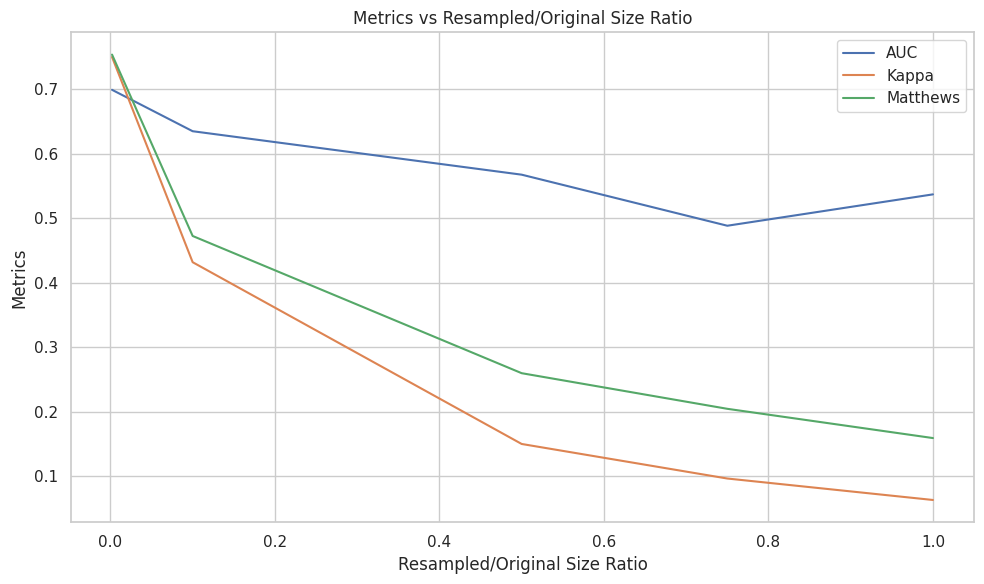

In [ ]:
catboost = CatBoostClassifier(use_best_model=True, task_type = "GPU")
balance_ratios = [0.002, 0.1, 0.5, 0.75, 1]
print(y_train.value_counts())
print("---------")
aucs = []
kappas = []
matthewss = []
resample_ratios = []

for balance_ratio in balance_ratios:
    under_sampler = RandomUnderSampler(sampling_strategy=balance_ratio, random_state=42)
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
    print(y_train_resampled.value_counts())
    print("---------")

    catboost.fit(X_train_resampled, y_train_resampled, eval_set=(X_val, y_val), verbose=False)

    aucc = average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])
    kappa = cohen_kappa_score(y_test, catboost.predict(X_test))
    matthews = matthews_corrcoef(y_test, catboost.predict(X_test))

    aucs.append(aucc)
    kappas.append(kappa)
    matthewss.append(matthews)
    resample_ratios.append(len(X_train_resampled) / len(X_train))


plt.figure(figsize=(10, 6))
plt.plot(balance_ratios, aucs, label='AUC')
plt.plot(balance_ratios, kappas, label='Kappa')
plt.plot(balance_ratios, matthewss, label='Matthews')
plt.xlabel('Resampled/Original Size Ratio')
plt.ylabel('Metrics')
plt.title('Metrics vs Resampled/Original Size Ratio')
plt.legend()

plt.tight_layout()
plt.show()

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å–ª–∏ —É–±–∏—Ä–∞—Ç—å –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å –≤—ã–±–æ—Ä–∫–∏ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å—è–¥–µ—Ç.

Tomek Links -  —ç—Ç–æ –ø–∞—Ä—ã –æ—á–µ–Ω—å –±–ª–∏–∑–∫–∏—Ö —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤, –Ω–æ –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω—ã–º –∫–ª–∞—Å—Å–∞–º. –£–¥–∞–ª–µ–Ω–∏–µ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–æ–≤ –≤ –∫–∞–∂–¥–æ–π –ø–∞—Ä–µ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –º–µ–∂–¥—É –¥–≤—É–º—è –∫–ª–∞—Å—Å–∞–º–∏, –æ–±–ª–µ–≥—á–∞—è –ø—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.


In [ ]:
from imblearn.under_sampling import TomekLinks

catboost = CatBoostClassifier(use_best_model=True, task_type="GPU")
tomek_links = TomekLinks()
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_train, y_train)

catboost.fit(X_train_resampled, y_train_resampled, eval_set=(X_val, y_val), verbose=False)

print(f'AUC-PR: {average_precision_score(y_test, catboost.predict_proba(X_test)[..., 1])}')
print(f'kappa: {cohen_kappa_score(y_test, catboost.predict(X_test))}')
print(f'matthews: {matthews_corrcoef(y_test, catboost.predict(X_test))}')


AUC-PR: 0.6732596346221652
kappa: 0.7498260790128315
matthews: 0.7536088618289372


–ù–µ–ø–ª–æ—Ö–æ, –Ω–æ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏—Ç + –æ—Å–æ–±–æ –Ω–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –ø–æ–¥–æ–±—Ä–∞—Ç—å

`–ø—Ä–æ–±—É–µ–º 0.8`

In [ ]:
from imblearn.over_sampling import SMOTE
class BinaryClassificationModel(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassificationModel, self).__init__()
        self.layer_1 = nn.Linear(input_dim, 256)
        self.layer_2 = nn.Linear(256, 128)
        self.layer_3 = nn.Linear(128, 1)
        self.drop = nn.Dropout(p=0.2)
        # self.layer_4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        # x = self.relu(self.layer_3(x))
        x = self.sigmoid(self.layer_3(x))
        return x

def mean_metrics(y_true, X, model, device):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        y_pred_proba = model(X_tensor).cpu().numpy().flatten()
        y_pred = (y_pred_proba > 0.5).astype(int)

    kappa = cohen_kappa_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc_pr = average_precision_score(y_true, y_pred_proba)
    print(round(kappa, 4), round(mcc, 4), round(auc_pr, 4))
    return (kappa + mcc + auc_pr) / 3.0

def calculate_metrics(model, X, y):
    with torch.no_grad():
        y_score = model(X).cpu().numpy().flatten()
        y_pred = (y_score > 0.5).astype(int)

    kappa = cohen_kappa_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    auc_pr = average_precision_score(y, y_score)

    print("Cohen's Kappa:", kappa)
    print("Matthews Correlation Coefficient:", mcc)
    print("AUC-PR:", auc_pr)

smote_params = {
    'k_neighbors': [7],
    'sampling_strategy': np.linspace(0.002, 0.9, 5)
}

nearmiss_params = {
    'n_neighbors': [7],
    'sampling_strategy': [0.1, 0.3]
}

best_score = 0
best_params = None
best_estimator = None

input_dim = X_train.shape[1]
num_epochs = 30
batch_size = 2048
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)

for smote_k in smote_params['k_neighbors']:
    for smote_strategy in smote_params['sampling_strategy']:
        # for nearmiss_k in nearmiss_params['n_neighbors']:
        #     for nearmiss_strategy in nearmiss_params['sampling_strategy']:
        #         print("Params ",smote_k, smote_strategy, nearmiss_k, nearmiss_strategy)
        #         nearmiss = NearMiss(n_neighbors=nearmiss_k, sampling_strategy=nearmiss_strategy)
        #         X_resampled, y_resampled = nearmiss.fit_resample(X_resampled, y_resampled)
                # smote = KMeansSMOTE(k_neighbors=smote_k, sampling_strategy=smote_strategy, cluster_balance_threshold = 0.0025, random_state=42)
                smote = SMOTE(k_neighbors=smote_k, random_state=42)
                X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
                # n_res, m_res = len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])
                # if n_res >= m_res / nearmiss_strategy:
                #     nearmiss = NearMiss(n_neighbors=nearmiss_k, sampling_strategy=nearmiss_strategy)
                #     X_resampled, y_resampled = nearmiss.fit_resample(X_resampled, y_resampled)

                X_resampled_array = X_resampled.to_numpy()
                y_resampled_array = y_resampled.to_numpy()

                train_dataset = TensorDataset(torch.tensor(X_resampled_array, dtype=torch.float32), torch.tensor(y_resampled_array, dtype=torch.float32))
                train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

                model = BinaryClassificationModel(input_dim).to(device)
                criterion = nn.BCELoss()
                optimizer = optim.Adam(model.parameters(), lr=learning_rate)
                scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

                for epoch in tqdm(range(num_epochs), desc="epoch"):
                    model.train()
                    for X_batch, y_batch in train_loader:
                        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                        optimizer.zero_grad()
                        y_pred = model(X_batch).squeeze()
                        loss = criterion(y_pred, y_batch)
                        loss.backward()
                        optimizer.step()

                    scheduler.step(loss)

                    if (epoch + 1) % 5 == 0:
                        print(f'Epoch {epoch}')
                        calculate_metrics(model, X_test_tensor, y_test)

                score = mean_metrics(y_test, X_test_tensor, model, device)

                if score > best_score:
                    best_score = score
                    best_params = {
                        'smote__k_neighbors': smote_k,
                        'smote__sampling_strategy': smote_strategy
                        # 'nearmiss__n_neighbors': nearmiss_k,
                        # 'nearmiss__sampling_strategy': nearmiss_strategy
                    }
                    best_estimator = model

best_estimator.eval()
with torch.no_grad():
    y_score = best_estimator(X_test_tensor).cpu().numpy().flatten()
    y_pred = (y_score > 0.5).astype(int)


kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc_pr = average_precision_score(y_test, y_score)

print("Best Parameters:", best_params)
print("Cohen's Kappa:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("AUC-PR:", auc_pr)


epoch:  17%|‚ñà‚ñã        | 5/30 [00:28<02:25,  5.83s/it]

Epoch 4
Cohen's Kappa: 0.2605894675126522
Matthews Correlation Coefficient: 0.34784201005619936
AUC-PR: 0.7202525347487736


epoch:  33%|‚ñà‚ñà‚ñà‚ñé      | 10/30 [00:55<01:52,  5.65s/it]

Epoch 9
Cohen's Kappa: 0.30270578722827246
Matthews Correlation Coefficient: 0.38123410570874766
AUC-PR: 0.7485555006981521


epoch:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 15/30 [01:23<01:23,  5.59s/it]

Epoch 14
Cohen's Kappa: 0.3000140930558567
Matthews Correlation Coefficient: 0.3791230054226517
AUC-PR: 0.738165938116323


epoch:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 20/30 [01:50<00:55,  5.58s/it]

Epoch 19
Cohen's Kappa: 0.48516889791811235
Matthews Correlation Coefficient: 0.5226401816030567
AUC-PR: 0.7207872955901785


epoch:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 25/30 [02:17<00:28,  5.60s/it]

Epoch 24
Cohen's Kappa: 0.4716553930030384
Matthews Correlation Coefficient: 0.5120520775041064
AUC-PR: 0.717541409662246


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [02:44<00:00,  5.50s/it]

Epoch 29
Cohen's Kappa: 0.4994769171606319
Matthews Correlation Coefficient: 0.5339108868073009
AUC-PR: 0.7215534384043067
0.4995 0.5339 0.7216



epoch:  17%|‚ñà‚ñã        | 5/30 [00:27<02:20,  5.60s/it]

Epoch 4
Cohen's Kappa: 0.08958533549772374
Matthews Correlation Coefficient: 0.1913516443567737
AUC-PR: 0.6756895951032488


epoch:  33%|‚ñà‚ñà‚ñà‚ñé      | 10/30 [00:54<01:51,  5.57s/it]

Epoch 9
Cohen's Kappa: 0.22119205511062123
Matthews Correlation Coefficient: 0.31562980883757474
AUC-PR: 0.7122366038042071


epoch:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 15/30 [01:22<01:24,  5.63s/it]

Epoch 14
Cohen's Kappa: 0.31107711053437703
Matthews Correlation Coefficient: 0.3877839855233481
AUC-PR: 0.7130357645883745


epoch:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 20/30 [01:49<00:56,  5.64s/it]

Epoch 19
Cohen's Kappa: 0.34973872536246675
Matthews Correlation Coefficient: 0.41779649109659944
AUC-PR: 0.7135793866859047


epoch:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 25/30 [02:17<00:28,  5.63s/it]

Epoch 24
Cohen's Kappa: 0.3533966575366543
Matthews Correlation Coefficient: 0.42062174058490864
AUC-PR: 0.7131011939322154


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [02:44<00:00,  5.49s/it]

Epoch 29
Cohen's Kappa: 0.3533966575366543
Matthews Correlation Coefficient: 0.42062174058490864
AUC-PR: 0.7126373984366059
0.3534 0.4206 0.7126



epoch:  17%|‚ñà‚ñã        | 5/30 [00:27<02:22,  5.70s/it]

Epoch 4
Cohen's Kappa: 0.3770506401989143
Matthews Correlation Coefficient: 0.4388600452532341
AUC-PR: 0.7129472543913659


epoch:  33%|‚ñà‚ñà‚ñà‚ñé      | 10/30 [00:55<01:52,  5.63s/it]

Epoch 9
Cohen's Kappa: 0.21690954083035474
Matthews Correlation Coefficient: 0.3120503555794489
AUC-PR: 0.6921603917146809


epoch:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 15/30 [01:23<01:24,  5.60s/it]

Epoch 14
Cohen's Kappa: 0.33920373133174053
Matthews Correlation Coefficient: 0.40964876149329543
AUC-PR: 0.7010773798226513


epoch:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 20/30 [01:51<00:55,  5.57s/it]

Epoch 19
Cohen's Kappa: 0.40408239443338767
Matthews Correlation Coefficient: 0.4596820613881248
AUC-PR: 0.6932259785203796


epoch:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 25/30 [02:18<00:27,  5.53s/it]

Epoch 24
Cohen's Kappa: 0.3946528785432547
Matthews Correlation Coefficient: 0.45241720891755566
AUC-PR: 0.691607528059616


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [02:46<00:00,  5.55s/it]

Epoch 29
Cohen's Kappa: 0.40408239443338767
Matthews Correlation Coefficient: 0.4596820613881248
AUC-PR: 0.6913052790957949
0.4041 0.4597 0.6913



epoch:  17%|‚ñà‚ñã        | 5/30 [00:27<02:16,  5.45s/it]

Epoch 4
Cohen's Kappa: 0.21690954083035474
Matthews Correlation Coefficient: 0.3120503555794489
AUC-PR: 0.7389403107929674


epoch:  33%|‚ñà‚ñà‚ñà‚ñé      | 10/30 [00:54<01:47,  5.37s/it]

Epoch 9
Cohen's Kappa: 0.21974601542463412
Matthews Correlation Coefficient: 0.31442314117138426
AUC-PR: 0.6862300613051919


epoch:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 15/30 [01:22<01:22,  5.52s/it]

Epoch 14
Cohen's Kappa: 0.24719894622228245
Matthews Correlation Coefficient: 0.3370231487935079
AUC-PR: 0.7126885433996447


epoch:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 20/30 [01:49<00:53,  5.40s/it]

Epoch 19
Cohen's Kappa: 0.3728917791894496
Matthews Correlation Coefficient: 0.43565610281431444
AUC-PR: 0.7169918945889432


epoch:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 25/30 [02:16<00:27,  5.41s/it]

Epoch 24
Cohen's Kappa: 0.34973872536246675
Matthews Correlation Coefficient: 0.41779649109659944
AUC-PR: 0.7155919237027346


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [02:44<00:00,  5.48s/it]

Epoch 29
Cohen's Kappa: 0.34615541894415447
Matthews Correlation Coefficient: 0.41502711069377707
AUC-PR: 0.7112249577154907
0.3462 0.415 0.7112



epoch:  17%|‚ñà‚ñã        | 5/30 [00:27<02:14,  5.38s/it]

Epoch 4
Cohen's Kappa: 0.09901755560922265
Matthews Correlation Coefficient: 0.19620149351865795
AUC-PR: 0.6067823522494201


epoch:  33%|‚ñà‚ñà‚ñà‚ñé      | 10/30 [01:04<02:27,  7.37s/it]

Epoch 9
Cohen's Kappa: 0.28740560099446555
Matthews Correlation Coefficient: 0.36073725620978075
AUC-PR: 0.6799375709357499


epoch:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 15/30 [01:44<01:59,  7.95s/it]

Epoch 14
Cohen's Kappa: 0.3360539178229798
Matthews Correlation Coefficient: 0.3985098129655076
AUC-PR: 0.6464766695612919


epoch:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 20/30 [02:11<01:00,  6.00s/it]

Epoch 19
Cohen's Kappa: 0.3068479889238024
Matthews Correlation Coefficient: 0.3759005143200728
AUC-PR: 0.6454245117792797


epoch:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 25/30 [02:38<00:28,  5.60s/it]

Epoch 24
Cohen's Kappa: 0.32572277578615927
Matthews Correlation Coefficient: 0.39052915287019085
AUC-PR: 0.6434558032363507


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [03:06<00:00,  6.21s/it]

Epoch 29
Cohen's Kappa: 0.32572277578615927
Matthews Correlation Coefficient: 0.39052915287019085
AUC-PR: 0.6423195775741586
0.3257 0.3905 0.6423
Best Parameters: {'smote__k_neighbors': 7, 'smote__sampling_strategy': 0.002}
Cohen's Kappa: 0.4994769171606319
Matthews Correlation Coefficient: 0.5339108868073009
AUC-PR: 0.7215534384043067


In [ ]:
def mean_metrics(y_true, X, classifier):
    kappa = cohen_kappa_score(y_true, classifier.predict(X))
    mcc = matthews_corrcoef(y_true, classifier.predict(X))
    auc_pr = average_precision_score(y_true, classifier.predict_proba(X)[:, 1])
    print(round(kappa,4), round(mcc,4), round(auc_pr, 4))
    return (kappa + mcc + auc_pr) / 3.0

smote_params = {
    'k_neighbors': [3, 9],
    'sampling_strategy': [0.1, 0.35, 0.5, 1.0]
}

nearmiss_params = {
    'n_neighbors': [3, 9],
    'sampling_strategy': [0.1, 0.35, 0.5, 1.0]
}

best_score = 0
best_params = None
best_estimator = None
n = len(y_train[y_train == 0])
m = len(y_train[y_train == 1])

for smote_k in tqdm(smote_params['k_neighbors'], desc="SMOTE k_neighbors"):
    for smote_strategy in tqdm(smote_params['sampling_strategy'], leave=False, desc="SMOTE sampling_strategy"):
        for nearmiss_k in tqdm(nearmiss_params['n_neighbors'], leave=False, desc="NearMiss n_neighbors"):
            for nearmiss_strategy in tqdm(nearmiss_params['sampling_strategy'], leave=False, desc="NearMiss sampling_strategy"):

                smote = BorderlineSMOTE(k_neighbors=smote_k, sampling_strategy=smote_strategy)
                X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

                n_res, m_res = len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])
                if n_res >= m_res / nearmiss_strategy:
                    nearmiss = NearMiss(n_neighbors=nearmiss_k, sampling_strategy=nearmiss_strategy)
                    X_resampled, y_resampled = nearmiss.fit_resample(X_resampled, y_resampled)

                classifier = CatBoostClassifier(silent=True, random_state=42, use_best_model = True)
                classifier.fit(X_resampled, y_resampled, eval_set = (X_val, y_val))

                score = mean_metrics(y_test, X_test, classifier)

                if score > best_score:
                    best_score = score
                    best_params = {
                        'smote__k_neighbors': smote_k,
                        'smote__sampling_strategy': smote_strategy,
                        'nearmiss__n_neighbors': nearmiss_k,
                        'nearmiss__sampling_strategy': nearmiss_strategy
                    }
                    best_estimator = classifier



y_score = best_estimator.predict_proba(X_test)[:, 1]
y_pred = best_estimator.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc_pr = average_precision_score(y_test, y_score)

print("Best Parameters:", best_params)
print("Cohen's Kappa:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("AUC-PR:", auc_pr)


SMOTE sampling_strategy:   0%|          | 0/4 [00:00<?, ?it/s]

NearMiss n_neighbors:   0%|          | 0/2 [00:00<?, ?it/s]


NearMiss sampling_strategy:   0%|          | 0/4 [00:00<?, ?it/s]


NearMiss sampling_strategy:  25%|‚ñà‚ñà‚ñå       | 1/4 [01:41<05:04, 101.50s/it]

0.6806 0.682 0.69





NearMiss sampling_strategy:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [02:43<02:36, 78.41s/it] 

0.2798 0.3548 0.6424





NearMiss sampling_strategy:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [03:41<01:08, 68.83s/it]

0.1596 0.2551 0.7024





NearMiss sampling_strategy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [04:34<00:00, 62.71s/it]


                                                                         

NearMiss n_neighbors:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1/2 [04:34<04:34, 274.53s/it]

0.0793 0.1742 0.6865





NearMiss sampling_strategy:   0%|          | 0/4 [00:00<?, ?it/s]


NearMiss sampling_strategy:  25%|‚ñà‚ñà‚ñå       | 1/4 [01:42<05:07, 102.55s/it]

0.6954 0.6961 0.7234





NearMiss sampling_strategy:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [02:42<02:35, 77.77s/it] 

0.2571 0.3368 0.6642





NearMiss sampling_strategy:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [03:41<01:09, 69.16s/it]

0.1747 0.2685 0.6523





NearMiss sampling_strategy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [04:33<00:00, 62.19s/it]


                                                                         

NearMiss n_neighbors: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [09:07<00:00, 273.87s/it]

                                                                    
SMOTE sampling_strategy:  25%|‚ñà‚ñà‚ñå       | 1/4 [09:07<27:23, 547.96s/it]

0.1057 0.2033 0.7051




NearMiss n_neighbors:   0%|          | 0/2 [00:00<?, ?it/s]


NearMiss sampling_strategy:   0%|          | 0/4 [00:00<?, ?it/s]


NearMiss sampling_strategy:  25%|‚ñà‚ñà‚ñå       | 1/4 [01:24<04:13, 84.50s/it]

0.615 0.6225 0.7244





NearMiss sampling_strategy:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [04:32<04:51, 145.51s/it]

0.6806 0.682 0.7044





NearMiss sampling_strategy:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [07:39<02:44, 164.16s/it]

0.4995 0.5259 0.661





NearMiss sampling_strategy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [10:54<00:00, 176.48s/it]


                                                                          

NearMiss n_neighbors:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1/2 [10:54<10:54, 654.45s/it]

0.2922 0.373 0.6825





NearMiss sampling_strategy:   0%|          | 0/4 [00:00<?, ?it/s]


NearMiss sampling_strategy:  25%|‚ñà‚ñà‚ñå       | 1/4 [01:29<04:27, 89.21s/it]

0.6664 0.6687 0.6919





NearMiss sampling_strategy:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [05:42<06:11, 185.83s/it]

0.6664 0.6687 0.7228





NearMiss sampling_strategy:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [08:35<03:00, 180.04s/it]

0.4096 0.4552 0.6591





NearMiss sampling_strategy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [11:08<00:00, 169.04s/it]


                                                                          

NearMiss n_neighbors: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [22:02<00:00, 662.43s/it]

                                                                    
SMOTE sampling_strategy:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [31:10<33:27, 1003.56s/it]

0.3054 0.3834 0.6847




NearMiss n_neighbors:   0%|          | 0/2 [00:00<?, ?it/s]


NearMiss sampling_strategy:   0%|          | 0/4 [00:00<?, ?it/s]


NearMiss sampling_strategy:  25%|‚ñà‚ñà‚ñå       | 1/4 [01:23<04:11, 83.77s/it]

0.5922 0.6027 0.7166





NearMiss sampling_strategy:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [02:48<02:48, 84.20s/it]

0.5814 0.5934 0.7132





NearMiss sampling_strategy:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [06:48<02:35, 155.55s/it]

0.615 0.6225 0.7423


In [ ]:
class BinaryClassificationModel(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassificationModel, self).__init__()
        self.layer_1 = nn.Linear(input_dim, 256)
        self.layer_2 = nn.Linear(256, 128)
        self.layer_3 = nn.Linear(128, 1)
        # self.drop = nn.Dropout(p=0.2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        # x = self.drop(x)
        x = self.relu(self.layer_2(x))
        # x = self.drop(x)
        x = self.sigmoid(self.layer_3(x))
        return x

input_dim = X_train.shape[1]
num_epochs = 25
batch_size = 1024
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)

smote = KMeansSMOTE(k_neighbors=7, sampling_strategy=0.8, cluster_balance_threshold=0.0025, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_resampled_array = X_resampled.to_numpy()
y_resampled_array = y_resampled.to_numpy()

train_dataset = TensorDataset(torch.tensor(X_resampled_array, dtype=torch.float32), torch.tensor(y_resampled_array, dtype=torch.float32))
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

model = BinaryClassificationModel(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

for epoch in tqdm(range(num_epochs), desc="epoch"):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    scheduler.step(epoch_loss)

model.eval()
with torch.no_grad():
    y_score = model(X_test_tensor).cpu().numpy().flatten()
    y_pred = (y_score > 0.5).astype(int)

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc_pr = average_precision_score(y_test, y_score)

print("Cohen's Kappa:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("AUC-PR:", auc_pr)


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [01:55<00:00,  4.64s/it]

Cohen's Kappa: 0.6396882805812127
Matthews Correlation Coefficient: 0.6443525381406625
AUC-PR: 0.663006508406583


–ø–æ –º–æ–µ–º—É –ø–æ–ª—É—á–∏–ª–æ—Å—å —á—Ç–æ –æ–≤–µ—Ä—Å—ç–º–ø–ª–µ—Ä—ã –Ω–µ —É–ª—É—á—à–∞—é—Ç –Ω–∏—á–µ–≥–æ
—è –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª –∏ –∫–∞—Ç–±—É—Å—Ç –∏ —Å–µ—Ç–∫–∏, AUC-PR –Ω–µ –≤—ã—à–ª–æ –≤—ã—à–µ 0.76(–Ω–æ –Ω–µ –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–º —Ç—Ä–∞–µ) –ø–æ–¥–Ω—è—Ç—å, –Ω–æ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã—à–µ 0.8

–Ø –±–µ–∑ –ø–æ–Ω—è—Ç–∏—è –ø–æ—á–µ–º—É —Å–µ–π—á–∞—Å —Ç–∞–∫–∏–µ —Å–ª–∞–±—ã–µ –º–µ—Ç—Ä–∏–∫–∏, random_state –≤—Ä–æ–¥–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω, –≤—Å–µ —Ç–æ –∂–µ —Å–∞–º–æ–µ, –Ω–æ –º–µ—Ç—Ä–∏–∫–∏ –≤–æ–æ–±—â–µ –¥—Ä—É–≥–∏–µ. –ö–∞–∫ –æ–±—ã—á–Ω–æ –∑–∞ —á–∞—Å –ø–µ—Ä–µ–¥ –¥–µ–¥–ª–∞–π–Ω–æ–º —Ç–∞–∫–æ–µ —Å–ª—É—á–∞–µ—Ç—Å—è...






# –ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª–∏–π.

–ö–∞–∫ —á–∞—Å—Ç–æ –±—ã–≤–∞–µ—Ç –≤ –∑–∞–¥–∞—á–∞—Ö, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–æ–π –≤—ã–±–æ—Ä–æ–∫, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –º–µ—Ç–æ–¥—ã –º–æ–≥—É—Ç –Ω–µ –≤—Å–µ–≥–¥–∞ –¥–∞–≤–∞—Ç—å –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Ç–∞–∫–∏–µ –º–µ—Ç–æ–¥—ã –º–æ–≥—É—Ç –∏—Å–∫–∞–∂–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–µ–∞–ª—å–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö. –í —Ä–µ–∞–ª—å–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö —Ç—Ä–µ–±—É–µ—Ç—Å—è —Ç—â–∞—Ç–µ–ª—å–Ω—ã–π –ø–æ–¥–±–æ—Ä –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –º–µ—Ç–æ–¥–æ–≤ –∏ –∏—Ö —Ç–æ—á–Ω–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞.

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ —Å–º–µ–Ω–∏–º –∞–∫—Ü–µ–Ω—Ç –∏ –ø–µ—Ä–µ–π–¥–µ–º –∫ –∑–∞–¥–∞—á–µ ‚Äú–æ–¥–Ω–æ–∫–ª–∞—Å—Å–æ–≤–æ–π‚Äù –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ —Ö–æ—Ä–æ—à–æ —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å –Ω–∞—à–µ–π –æ–±–ª–∞—Å—Ç—å—é —Ä–∞–±–æ—Ç—ã, —Ç–∞–∫ –∫–∞–∫ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ –∞–Ω–æ–º–∞–ª–∏–∏, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –∫–∞–∫ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ, —Ç–∞–∫ –∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–∞–±–ª—é–¥–∞–µ–º–æ–π –¥–∏—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö.

–ú–µ—Ç–æ–¥—ã –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª–∏–π –æ–±—ã—á–Ω–æ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –∫–ª–∞—Å—Å—É –º–µ—Ç–æ–¥–æ–≤ –æ–±—É—á–µ–Ω–∏—è –±–µ–∑ —É—á–∏—Ç–µ–ª—è, —á—Ç–æ –∏–º–µ–µ—Ç —Å–≤–æ–∏ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ ‚Äî –Ω–µ –≤—Å–µ–≥–¥–∞ –Ω—É–∂–Ω–æ —Ç—Ä–∞—Ç–∏—Ç—å –≤—Ä–µ–º—è –Ω–∞ —Ä–∞–∑–º–µ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö. –û–¥–Ω–∞–∫–æ –¥–ª—è –∫–æ–Ω—Ç—Ä–æ–ª—è –∫–∞—á–µ—Å—Ç–≤–∞ –≤—Å–µ –∂–µ —Å—Ç–æ–∏—Ç —Ä–∞–∑–º–µ—Ç–∏—Ç—å —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö. –•–æ—Ç—è —Ç–∞–∫–∏–µ –º–µ—Ç–æ–¥—ã —á–∞—Å—Ç–æ —É—Å—Ç—É–ø–∞—é—Ç –≤ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–µ—Ç–æ–¥–∞–º –æ–±—É—á–µ–Ω–∏—è —Å —É—á–∏—Ç–µ–ª–µ–º, –æ–Ω–∏ –æ—Å—Ç–∞—é—Ç—Å—è –ø–æ–ª–µ–∑–Ω—ã–º–∏, –∫–æ–≥–¥–∞ —Ä–∞–∑–º–µ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∑–∞—Ç—Ä—É–¥–Ω–µ–Ω–∞.

–í —Ä–∞–º–∫–∞—Ö –Ω–∞—à–µ–π —Ä–∞–±–æ—Ç—ã –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ–¥—Ö–æ–¥, –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π Random Forest, –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏ –∞–Ω–æ–º–∞–ª–∏–π –±–µ–∑ —Ä–∞–∑–º–µ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö ‚Äî —ç—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º Isolation Forest. –í –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è —Å–æ–∑–¥–∞–µ—Ç—Å—è –∞–Ω—Å–∞–º–±–ª—å —Ä–µ—à–∞—é—â–∏—Ö –¥–µ—Ä–µ–≤—å–µ–≤, –≤ –∫–æ—Ç–æ—Ä–æ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø–æ—Ä–æ–≥–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –≤–µ—Ä—à–∏–Ω—ã –≤—ã–±–∏—Ä–∞—é—Ç—Å—è —Å–ª—É—á–∞–π–Ω–æ. –û—Ü–µ–Ω–∫–∞ –∞–Ω–æ–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —á–µ—Ä–µ–∑ –¥–ª–∏–Ω—É –ø—É—Ç–∏ –¥–æ –ª–∏—Å—Ç–∞ –≤ –∫–∞–∂–¥–æ–º –¥–µ—Ä–µ–≤–µ.

–ó–∞–¥–∞—á–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤–µ—Ä—Å–∏–∏ —ç—Ç–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞, –∏–∑–≤–µ—Å—Ç–Ω–æ–π –∫–∞–∫ Extended Isolation Forest. –í —ç—Ç–æ–º –≤–∞—Ä–∏–∞–Ω—Ç–µ –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –º—ã –±—É–¥–µ–º –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –Ω–µ –ø—Ä–æ—Å—Ç–æ –ø–æ—Ä–æ–≥ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞, –∞ –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω—É—é —Å–ª—É—á–∞–π–Ω—É—é –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç—å, –∫–æ—Ç–æ—Ä–∞—è —Ä–∞–∑–¥–µ–ª—è–µ—Ç –≤—ã–±–æ—Ä–∫—É –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏.

–ü—Ä–∏–º–µ—á–∞–Ω–∏—è:

	‚Ä¢	–í –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ—ç—Ç–æ–º—É –∏—Ö –æ–±—Ä–∞–±–æ—Ç–∫—É –º–æ–∂–Ω–æ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å.
	‚Ä¢	–ß–∏—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞–¥–ª–µ–∂–∞—â–∏–º –æ–±—Ä–∞–∑–æ–º.
	‚Ä¢	–í–∞–∂–Ω–æ —Ç—â–∞—Ç–µ–ª—å–Ω–æ —Å–ª–µ–¥–∏—Ç—å –∑–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å—é –∑–Ω–∞–∫–æ–≤ –≤ —Ä–∞—Å—á–µ—Ç–∞—Ö.
	‚Ä¢	–•–æ—Ç—è –º–µ—Ç–æ–¥—ã –æ–±—É—á–µ–Ω–∏—è –±–µ–∑ —É—á–∏—Ç–µ–ª—è —á–∞—Å—Ç–æ —É—Å—Ç—É–ø–∞—é—Ç supervised-—Ä–µ—à–µ–Ω–∏—è–º –ø–æ –∫–∞—á–µ—Å—Ç–≤—É, —ç—Ç–æ –Ω–µ –ø–æ–≤–æ–¥ —Å–æ–º–Ω–µ–≤–∞—Ç—å—Å—è –≤ –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–¥—Ö–æ–¥–∞, –µ—Å–ª–∏ –≤—ã —É–≤–µ—Ä–µ–Ω—ã –≤ —Å–≤–æ–∏—Ö –¥–µ–π—Å—Ç–≤–∏—è—Ö.

–î–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–∞—Ä–∞–ª–ª–µ–ª–∏–∑–∞—Ü–∏–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º multiprocessing –∏–ª–∏ joblib, –∞ —Ç–∞–∫–∂–µ –¥–æ–±–∞–≤–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –æ—Ç–∫–∞—Ç–∞ –∫ –±–∞–∑–æ–≤–æ–º—É –≤–∞—Ä–∏–∞–Ω—Ç—É Isolation Forest. –í–∞–∂–Ω–æ –æ–±–¥—É–º–∞—Ç—å, –∫–∞–∫ —ç—Ç–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ –≤ —Ä–∞–º–∫–∞—Ö –º–æ–¥–µ–ª–∏ Extended Isolation Forest.

In [ ]:
from joblib import Parallel, delayed
def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST
    """
    if n <= 1:
        return 0
    return 2 * (np.log(n - 1) + np.euler_gamma) - (2 * (n - 1) / n)


def calc_height(X, depth, node):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node

        depth: int - path length up to current node

        node: Node - current tree node

    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """
    if node.kind == "external":
        return depth + c_factor(node.size)

    side = np.dot(X, node.w) + node.b <= 0
    left_indices = side
    right_indices = ~side

    scores = np.zeros(X.shape[0])
    if node.left:
        scores[left_indices] = calc_height(X[left_indices], depth + 1, node.left)
    if node.right:
        scores[right_indices] = calc_height(X[right_indices], depth + 1, node.right)

    return scores


class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.

    Attributes:
        X: np.array - data available to current node
        size: int - length of available data

        depth: int - depth of node

        left: Node - left child
        right: Node - right child

        kind: str - either "internal" or "external", indicates the type of current node

        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left=None, right=None, kind="external", w=None, b=None):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.

        Params:
            X: np.array - data available to current node
            depth: int - depth of node

            left: Node - left child
            right: Node - right child

            kind: str - either "internal" or "external", indicates the type of current node

            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane

        """
        self.size = len(X)
        self.depth = depth
        self.left = left
        self.right = right
        self.kind = kind
        self.w = w
        self.b = b

    def __repr__(self):
        """
        For convenience only.
        """
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"


class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth

        max_depth: int - maximum tree depth

        root: Node - root node

        internal_count: int - number of internal nodes

        external_count: int - number of external nodes

    """
    def __init__(self, X, max_depth):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth

        """
        self.depth = 0
        self.max_depth = max_depth
        self.internal_count = 0
        self.external_count = 0
        self.root = self.grow(X, 0)

    def __repr__(self):
        """
        For convenience only.
        """
        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"

    def grow(self, X, depth):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample

            depth: int - current tree depth

        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        if depth >= self.max_depth or len(X) <= 1:
            self.external_count += 1
            return Node(X, depth, kind="external")

        self.internal_count += 1

        dim = X.shape[1]
        w = np.random.normal(size=dim)
        w /= np.linalg.norm(w)
        b = np.random.uniform(np.min(np.dot(X, w)), np.max(np.dot(X, w)))

        left_indices = np.dot(X, w) + b <= 0
        right_indices = ~left_indices

        left_child = self.grow(X[left_indices], depth + 1)
        right_child = self.grow(X[right_indices], depth + 1)

        return Node(X, depth, left_child, right_child, kind="internal", w=w, b=b)

    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated

        Returns:
            scores: np.array - estimated anomaly scores
        """
        return calc_height(X, 0, self.root)


class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees

        max_depth: int - maximum depth of each tree

        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

        trees: list - container for trained trees

        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

    """

    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01, use_sklearn_if = False, n_jobs = 1):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees

            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2(subsample_size)) if not provided

            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.use_sklearn_if = use_sklearn_if
        self.is_fit = False
        self.n_jobs = n_jobs

        if self.use_sklearn_if:
            self.model = IsolationForest(n_estimators=n_trees, max_samples=subsample_rate, contamination=contamination, n_jobs=n_jobs)


    def __repr__(self):
        """For convenience only."""
        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"

    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        if self.use_sklearn_if:
            self.model.fit(X)
            self.is_fit = True
            return self

        n_samples = X.shape[0]
        subsample_size = int(self.subsample_rate * n_samples)
        self.max_depth = self.max_depth or int(np.ceil(np.log2(subsample_size)))

        def build_tree(X_sub):
            return RandomizedTree(X_sub, self.max_depth)

        self.trees = Parallel(n_jobs=self.n_jobs)(delayed(build_tree)(X[np.random.choice(n_samples, subsample_size, replace=False)]) for _ in range(self.n_trees))

        self.is_fit = True
        return self

    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples

        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        if self.use_sklearn_if:
            return -self.model.decision_function(X)

        if not self.is_fit:
            raise Exception("Model is not fit yet.")

        scores = np.zeros(X.shape[0])
        for tree in self.trees:
            scores += tree.score_samples(X)

        scores /= len(self.trees)
        return np.power(2, -scores / c_factor(X.shape[0]))

    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples

        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        scores = self.score_samples(X)
        threshold = np.percentile(scores, 100 * (1 - self.contamination))
        return (scores >= threshold).astype(int)

**–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º –∏ –ø–æ–¥–±–µ—Ä–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã**

In [ ]:
y_train.value_counts()[1] / y_train.value_counts()[0]

0.0018335473204706544

In [ ]:
import itertools
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
# X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
# X_val_np = X_val.values if isinstance(X_val, pd.DataFrame) else X_val

param_grid = {
    'n_trees': [100],
    'max_depth': [15, 25],
    'subsample_rate': [0.075, 0.15],
    'contamination': [0.01, 0.05]
}

best_auc_pr = float('-inf')
best_params = None
n = len(list(itertools.product(*param_grid.values())))
i = 0

for n_trees in param_grid['n_trees']:
    for max_depth in param_grid['max_depth']:
        for subsample_rate in param_grid['subsample_rate']:
            for contamination in param_grid['contamination']:
                eiforest = ExtendedIsolationForest(n_trees=n_trees, max_depth=max_depth, subsample_rate=subsample_rate, contamination=contamination)
                eiforest.fit(X_train_np)

                y_pred= eiforest.predict(X_train_np)
                auc_pr = average_precision_score(y_train, y_pred)

                if auc_pr > best_auc_pr:
                    best_auc_pr = auc_pr
                    best_params = {'n_trees': n_trees, 'max_depth': max_depth, 'subsample_rate': subsample_rate, 'contamination': contamination}
                i += 1
                print(f"{i} / {n}")

print("Best AUC-PR:", best_auc_pr)
print("Best params:", best_params)


1 / 8
2 / 8
3 / 8
4 / 8
5 / 8
6 / 8
7 / 8
8 / 8
Best AUC-PR: 0.0019493324686029288
Best params: {'n_trees': 50, 'max_depth': 15, 'subsample_rate': 0.075, 'contamination': 0.01}


In [ ]:
#your code here
from sklearn.ensemble import IsolationForest
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train

iforest_sklearn = IsolationForest(n_estimators=100, contamination=0.15, max_samples=0.3, random_state=42)
iforest_sklearn.fit(X_train)
y_pred_sklearn = -iforest_sklearn.predict(X_train_np)
y_predp_sklearn = iforest_sklearn.score_samples(X_train_np)


eiforest = ExtendedIsolationForest(n_trees=100, subsample_rate=0.3, contamination=0.15, max_depth=15)
eiforest.fit(X_train_np)

y_pred_eiforest = eiforest.predict(X_train_np)
y_predp_eiforest = eiforest.score_samples(X_train_np)

auc_pr_sklearn = aps(y_train, y_predp_sklearn)
auc_pr_eiforest = aps(y_train, y_predp_eiforest)
kappa_sklearn = cohen_kappa_score(y_train, y_pred_sklearn)
kappa_eiforest = cohen_kappa_score(y_train, y_pred_eiforest)
matthews_sklearn =  matthews_corrcoef(y_train, y_pred_sklearn)
matthews_eiforest =  matthews_corrcoef(y_train, y_pred_eiforest)

print("AUC-PR for IsolationForest (scikit-learn):", auc_pr_sklearn)
print("AUC-PR for ExtendedIsolationForest:", auc_pr_eiforest)
print("kappa for IsolationForest (scikit-learn):", kappa_sklearn)
print("kappa for ExtendedIsolationForest:", kappa_eiforest)
print("matthews for IsolationForest (scikit-learn):", matthews_sklearn)
print("matthews for ExtendedIsolationForest:", matthews_eiforest)

AUC-PR for IsolationForest (scikit-learn): 0.000926118912501819
AUC-PR for ExtendedIsolationForest: 0.12545174085722227
kappa for IsolationForest (scikit-learn): 0.001398042487872897
kappa for ExtendedIsolationForest: 0.017259010316484247
matthews for IsolationForest (scikit-learn): 0.04578932479355712
matthews for ExtendedIsolationForest: 0.08553954013661585


EIF –∫—Ä—É—á–µ –ø–æ–ª—É—á–∏–ª—Å—è –Ω–æ –Ω–µ –æ—á–µ–Ω—å –≤—Å–µ —Ä–∞–≤–Ω–æ
